In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
# Load the uploaded dataset
data_path = '../sum_data-0.csv'
data = pd.read_csv(data_path)


data.head()

,data,label
0,job posting - apple-iss research center conten...,0.0
1,"lang classification grimes , joseph e . and b...",0.0
2,query : letter frequencies for text identifica...,0.0
3,risk a colleague and i are researching the dif...,0.0
4,request book information earlier this morning ...,0.0


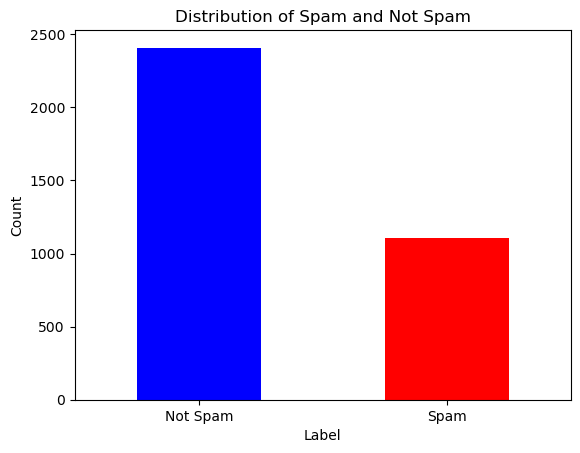

In [29]:
# Plotting the distribution of the 'label' in the dataset
data['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Spam and Not Spam')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'], rotation=0)
plt.show()

In [30]:
# Preprocessing: Remove any NaN values
data.dropna(inplace=True)

In [41]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['label'], test_size=0.2, random_state=42)


In [42]:
# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [44]:
# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train,sample_weight=None)


LogisticRegression()

In [45]:
# Predicting the labels for the testing set
y_pred = model.predict(X_test_vectorized)

In [46]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}%')
print(f'Report: {report}')

Accuracy: 0.99%
Report:               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       495
         1.0       0.98      0.98      0.98       209

    accuracy                           0.99       704
   macro avg       0.98      0.99      0.98       704
weighted avg       0.99      0.99      0.99       704



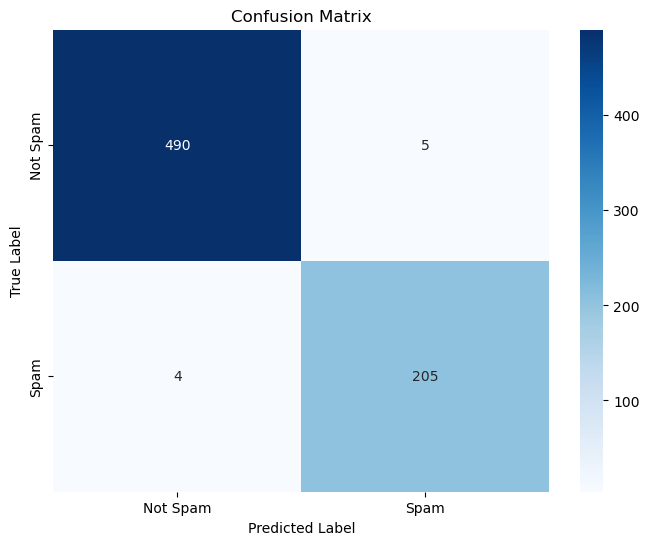

In [47]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from joblib import dump

In [59]:
import joblib
# Save the model
joblib.dump(model, 'logistic_regression_model.joblib')

# Save the vectorizer
joblib.dump(vectorizer, 'count_vectorizer.joblib')

['count_vectorizer.joblib']

In [60]:
from joblib import load

In [61]:
# Load the model
loaded_model = joblib.load('logistic_regression_model.joblib')

# Load the vectorizer
loaded_vectorizer = joblib.load('count_vectorizer.joblib')

In [64]:
# Example texts
text_not_spam = "Hey! How are you doing. Let's catch up soon!"
text_spam = "Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize. "

# Vectorize the texts
texts_vectorized = loaded_vectorizer.transform([text_not_spam, text_spam])

# Make predictions
predictions = loaded_model.predict(texts_vectorized)

# Output predictions
print(predictions)  # This will show an array of predicted labels, e.g., [0, 1]


[1. 1.]
